*   Student name: **[Michael Cordero]**
*   Student Panther ID: **[6331927]**
*   Collaborator(s): **[Fill your collaborator(s)' name here]**
*   **Notice on Academic Misconduct**: Sharing your codes with other students is also an academic misconduct. If your submission is found unsually similar to that of another student, you will be reported to the SCAI as a potential academic misconduct case, regardless of your reasons. Violations may lead to suspension or expulsion from the university.

# CAP5602 Homework 3 (15% total grade)

## **Deadline: 10/19/2022 11:59 PM**

In this homework, we will train, test, and visualize SVM models on a toy classification dataset. First, execute the code snippet below to generate the dataset.

In [ ]:
import sklearn.svm
from sklearn.datasets import make_moons

# Generate the dataset with 300 examples
X, Y = make_moons(n_samples=300, noise=.15, random_state=15)

# Print shape of dataset for checking
print('Input shape: ', X.shape)
print('Output shape: ', Y.shape)

Input shape:  (300, 2)
Output shape:  (300,)


## 1. Visualize the dataset (1% total grade)

Using `matplotlib` to plot and show a scatter plot with all the points in the dataset. Use a different color for each different class.

<function matplotlib.pyplot.show(close=None, block=None)>

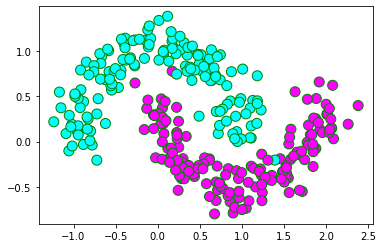

In [ ]:
# Write your code here
import matplotlib.pyplot as plot

plot.scatter(X[:, 0], X[:, 1], c=Y, cmap=plot.cm.cool, s=100, edgecolors='g')
plot.show
# array slice with commas means [start(row index):stop(row index),columns:(step size defaults to 1)], so for this example, we are defaulting with all the row values (by entering nothing) and only taking the rows from the 0th and 1th column respectively.

**Grader's comment:** Correct (1%)

## 2. Split dataset into train/test sets (1% total grade)

Write code to randomly split your dataset above into a train set and a test set. Your train set must contain 200 examples and your test set must contain 100 examples.

In [ ]:
# Write your code here
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, train_size=200, random_state=43)

**Grader's comment:** Correct (1%)

## 3. Train a linear SVM (2% total grade)

Write code to define an SVM with linear kernel and regularization **C=2.0**, then train it with your train set. Use the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class to define your model.

In [ ]:
# Write your code here
from sklearn.svm import SVC

svm = SVC(C=2.0, kernel='linear')
svm.fit(X_train, Y_train)

SVC(C=2.0, kernel='linear')

**Grader's comment:** Correct (2%)

## 4. Evaluate your linear SVM (2% total grade)

Write code to predict the labels of the test set using your trained linear SVM above. Then compute and print out the test accuracy of your model.

In [ ]:
# Write your code here
from sklearn.metrics import accuracy_score

Y_prediction = svm.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction)
print(f'Accuracy of svm: {accuracy}')

Accuracy of svm: 0.88


**Grader's comment:** Correct (2%)

## 5. Visualize your model

### 5a. Create a meshgrid on the 2-dimensional space covering the data (1% total grade)

Write code to create a meshgrid on the 2d space covering $[min\_x_i - 0.3, max\_x_i + 0.3)$ for all dimensions (or features) of your input data. Here, $min\_x_i$ is the minimum value of the $i^{th}$ feature over the entire dataset. Similarly, $max\_x_i$ is the maximum value of the $i^{th}$ feature over the dataset. Use step size 0.01 for the meshgrid. Your code should define two variables `xx` and `yy` returned from the [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function.

In [ ]:
# Write your code here
import numpy as np

f0 = X[:,0]
f1 = X[:,1]

f0_min, f0_max = f0.min() - 0.3, f0.max() + 0.3
f1_min, f1_max = f1.min() - 0.3, f1.max() + 0.3
step_size = 0.01

xx, yy = np.meshgrid(np.arange(f0_min, f0_max, step_size), np.arange(f1_min, f1_max, step_size))

**Grader's comment:** Correct (1%)

### 5b. Make predictions on the meshgrid (1% total grade)

Use your model to make predictions on your meshgrid, then reshape your predictions to the shape of `xx`.

In [ ]:
# Write your code here
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

**Grader's comment:** Correct (1%)

### 5c. Plot your model (1% total grade)

Plot the contour of your predictions on the meshgrid (using [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)) together with the scatter plot showing the data points (with an appropriate color for each class).

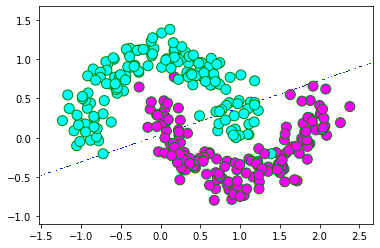

In [ ]:
# Write your code here
from matplotlib.pyplot import contourf
cf = contourf(xx, yy, Z, colors=['w', 'b', 'g'])
plot.scatter(f0, f1, c=Y, cmap=plot.cm.cool, s=100, edgecolors='g')
plot.show()

**Grader's comment:** Bad color setting for contourf (0.5%)

## 6. Experiment with RBF kernel SVM

### 6a. Train an SVM with RBF kernel (2% total grade)

Now, write code to define and train an SVM with an **RBF kernel and C=2.0** on the train set. You can use the default value for other parameters of your model.

In [ ]:
# Write your code here
svrbf = SVC(C=2.0, kernel='rbf')
svrbf.fit(X_train, Y_train)

SVC(C=2.0)

**Grader's comment:** Correct (2%)

### 6b. Evaluate your RBF kernel SVM (1% total grade)

Write code to compute and print out the accuracy of this RBF kernel SVM on your test set. 

In [ ]:
# Write your code here
rbf_pred = svrbf.predict(X_test)
rbf_acc = accuracy_score(Y_test, rbf_pred)
print(f"RBF Accuracy: {rbf_acc}")

RBF Accuracy: 1.0


**Grader's comment:** Correct (1%)

### 6c. Visualize your RBF kernel SVM (1% total grade)

Similar to questions 5b and 5c above, visualize your RBF kernel SVM. You can re-use the meshgrid constructed in question 5a and don't need to reconstruct them. Your code must show the plot containing the contour and the data points.

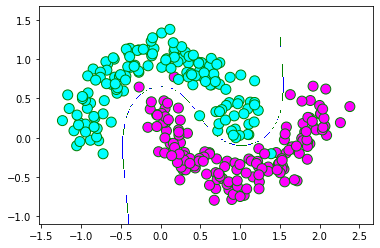

In [ ]:
# Write your code here
rbf_Z = svrbf.predict(np.c_[xx.ravel(), yy.ravel()])
rbf_Z = rbf_Z.reshape(xx.shape)
rbf_cf = contourf(xx, yy, rbf_Z, colors=['w', 'b', 'g'])
plot.scatter(f0, f1, c=Y, cmap=plot.cm.cool, s=100, edgecolors='g')
plot.show()

**Grader's comment:** Bad color setting for contourf (0.5%)

## 7. Comparing SVMs with different kernels (2% total grade)

According to the above experiments, which model is better on this dataset? Why?

**Your answer**: The SVM allocated with kernel: RBF is better because it has an accuracy score of 1.0, whereas the SVM allocated with the linear kernel has an accuracy score of 0.88. This aligns with theory, as the data yields half moons, which are hardly linearly separable. The contour even illustrates a more geometrically consistent maximum margin.

**Grader's comment:** Correct (2%)